# VIDEO GAMES SALES PREDICTIONS (2024)

### Library

In [1]:
# Data Table 
import numpy as np                       # matrices & arrays
import pandas as pd                      # Data Table & dataframe 
from skimpy import skim                  # skim data
from prettytable import PrettyTable      # Create Tables

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis Testing 
import scipy.stats as sps                 # statistical tests
from scipy.stats.mstats import winsorize  # Winsorizing
import statsmodels.api as sm              # regression
from statsmodels.formula.api import ols   # regression model
from scipy.stats import boxcox            # ideal way to transform skewed to normal

# Machine Learning 
import sklearn as sklearn                 # scikit learn package
from sklearn.preprocessing import PolynomialFeatures
                                          # Polynomial Features
from sklearn.decomposition import PCA     # PCA
from sklearn.feature_extraction import DictVectorizer
                                          # Categorical encoding
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, LabelBinarizer, OneHotEncoder
                                          # Categorical Encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
                                          # Continuous Scalers 
from sklearn.model_selection import train_test_split
                                          # split train & test set
from sklearn.model_selection import KFold, cross_val_predict
                                          # Cross-validation 
from sklearn.pipeline import Pipeline
                                          # Pipeline the cross validation

from sklearn.model_selection import GridSearchCV
                                          # Grid Search CV 
from sklearn.metrics import r2_score, mean_squared_error
                                          # Model Evaluation Metrics

# Options
import warnings
warnings.filterwarnings('ignore')         # suppress all warnings; switch 'ignore' to 'default' to to re-enable it again
pd.set_option('display.max_rows', 500)    # display max rows 
pd.set_option('display.max_columns', 500) #         max cols
pd.set_option('display.width', 1000)      #         max width
pd.set_option('display.precision', 2)     #         round 2 places after decimal 

### Functions

#### nadup()
This function will return a summary table detailing the following information
1. Variables Names 
2. The type of the variable. 
3. All unique values. 
4. Number of unique values.  
5. Number of NaN values. 
6. % of unique values per variable. 

In [2]:
# Functions for calculation
def nadup(df):
    arr, arr2, arr3, arr4 = [], [], [], []
    for col in df.columns:
      temp = [str(x) for x in df[col].unique()]    # convert cols to str
      temp2 = df[col].isna().sum()                 # calculate sum of NaN    
      temp3 = (df[col].isna().sum())/len(df)*100   # calculate % of NaN
      arr.append(', '.join(temp))                   
      arr2.append(len(temp))
      arr3.append(temp2)
      arr4.append(round(temp3,1))
    print('The dataframe has a total of %i rows & %i columns. A total of %i NA values were detected.\n' %(df.shape[0],df.shape[1],df.isnull().any(axis=1).sum()),
          ' This dataframe has',df.duplicated().sum(),'duplicated rows')
    summary = pd.DataFrame({
        'Variables': df.columns,
        'Type':df.dtypes.to_list(),
        'Unique Values':arr,
        'Sum of Unique Values': arr2,
        'Sum of NaN Values': arr3,
        '% of NaN': arr4}).sort_values('% of NaN', ascending = False)
    display(summary)

#### nacheck(var)
This function is used to see the distribution of scores and detect the presence of any outliers. This process will be used to determine the appropriate methods to fill in NA values. 

In [3]:
# Check the influence of NA values 
def nacheck(var):
    '''
    Descriptive Statistics Table 
    ''' 
    mode = sps.mode(var)
    n = len(var)
    from prettytable import PrettyTable 
    summary = PrettyTable(["Descriptive Statistics", ""]) 
    summary.add_row(["Sample Size", n])
    summary.add_row(["Sample Mean", round(var.mean(),3)])
    summary.add_row(["Sample Median", round(var.median(),3)])
    summary.add_row(["Mode", mode.mode])
    summary.add_row(["Max", var.max()])
    summary.add_row(["Min", var.min()])
    summary.add_row(["Range", round(var.max() - var.min(),3)])
    summary.add_row(["Standard Deviation", round(var.std(),3)])
    summary.add_row(["Variance", round(var.var(),3)])
    summary.add_row(['NA values', var.isna().sum()])
    print(summary)
    '''
    Visualization
    '''
    fig, ax = plt.subplots(1,2)                          # Making (row, col) of plots  
    fig.set_figheight(3)                                 # set height 
    fig.set_figwidth(5)                                 # set width
    sns.set(style = 'white')                         # Style (style, palette argument)
    sns.kdeplot(var, color = 'red',
                alpha = .1, fill = 'true',
                ax = ax[0])                              # Distribution plot
    sns.boxplot(y = var, ax= ax[1])                      # Boxplot 
    fig.tight_layout()                                   # Tight layout
    plt.show()                                           # show plots

#### dsit_by_group()
This function can be used to gauge the distribution of scores by groups. This function will return a summary table contains the mean, median, standard deviation, counts, NA counts, and percentage of NA values by group. A multi-level kde-plots is also provided to illustrate the distribution of scores by groups. 

In [4]:
def dist_by_group(df,var,group,wrap_by):
    '''Summary Table'''
    missing = df[var].isnull().sum()
    m = df.groupby(group).agg({var: ['count','mean','median','std']}).reset_index()   # aggregate functions
    m.columns = m.columns.droplevel(0)
    m.columns = [group,'count','mean','median','std']
    n = df[var].isnull().groupby(df[group]).sum()     # Count Number of NA values
    o = n.to_frame().reset_index()                    # turn it into a df
    o.columns = [group,'NA count']
    u = m.merge(o, on = group, how = 'left')          # merge both df
    u['percent NA'] = round(u['NA count']/missing,2)  # percentage of all missing values 
    print('There is a total of %i NA values in %s' %(missing,var))
    display(u)
    '''Visualization'''
    # create a grid 
    g = sns.FacetGrid(df, col= group, hue= group, col_wrap =wrap_by)
    # draw density plots
    g = g.map(sns.kdeplot, var, cut=0, fill=True, common_norm=False, alpha=.5, legend=False)
    g = g.set_titles("{col_name}")   # set title
    # show the graph
    plt.show()

### About the dataset
This dataset was created by user `SID_TWR` on [Kaggle](https://www.kaggle.com/), a Machine Learning and Data Science Community in 2019. As of February 2nd, 2024, the dataset has 243,000 views and 46,300 downloads. 

According to the owner (i.e., user `SID_TWR`), this dataset was inspired by Gregory Smith's webscrape of [VGChartz Video Games Sales dataset](https://www.kaggle.com/datasets/mathurtanvi/video-game-sales-dataset). This dataset contains the name, platform, year of release, genre, publisher, sales of video games in North America, Europe, Japan, Other countries, and total global sales. The dataset I use for this project extends the variables, in which the owner performed webscraping on [Metacritic](https://www.metacritic.com/) for the following variables: critic scores, critic count, user score, user count, developer, and ESRB ratings of each video games, along with the video game sales variable mentioned above. 

This dataset can be accessed and downloaded here: [Video Games Sales Dataset,
Video Games Sales & Game Ratings Data Scraped from VzCharts](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset/data?select=Video_Games_Sales_as_at_22_Dec_2016.csv)

In [5]:
# importing
games = pd.read_csv('sales.csv')

# rename 
games.columns = ['name','platform','release_year',
                 'genre','publisher','na_sales','eu_sales',
                 'jp_sales','other_sales','global_sales',
                 'critic_scores','n_critic','user_scores',
                 'n_user','developer','esrb']

# Information
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           16717 non-null  object 
 1   platform       16719 non-null  object 
 2   release_year   16450 non-null  float64
 3   genre          16717 non-null  object 
 4   publisher      16665 non-null  object 
 5   na_sales       16719 non-null  float64
 6   eu_sales       16719 non-null  float64
 7   jp_sales       16719 non-null  float64
 8   other_sales    16719 non-null  float64
 9   global_sales   16719 non-null  float64
 10  critic_scores  8137 non-null   float64
 11  n_critic       8137 non-null   float64
 12  user_scores    7590 non-null   float64
 13  n_user         7590 non-null   float64
 14  developer      10096 non-null  object 
 15  esrb           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [6]:
# Remove unnecessary columns 
games = games.drop(columns=['na_sales', 'eu_sales','jp_sales','other_sales'])

# info again
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           16717 non-null  object 
 1   platform       16719 non-null  object 
 2   release_year   16450 non-null  float64
 3   genre          16717 non-null  object 
 4   publisher      16665 non-null  object 
 5   global_sales   16719 non-null  float64
 6   critic_scores  8137 non-null   float64
 7   n_critic       8137 non-null   float64
 8   user_scores    7590 non-null   float64
 9   n_user         7590 non-null   float64
 10  developer      10096 non-null  object 
 11  esrb           9950 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1.5+ MB


### Goals
For this project, I will try to predict the global sales of video games using multiple predictors. This project will place a heavier emphasis on prediction and less on explanation. 
1. **Descriptive.** 
- Visualize some of the top 10 or top 25 video games, genres, or publishers with the highest sales. 
- Identify the association between global sales and various predictors. 

2. **Predictive.** 
- Construct two algorithms to predict global sales, one with features engineering and one without feature engineering, using various predictors. 
- Utilize different metrics to identify the best algorithm. 

### Questions 
##### Descriptive questions. 
1. What are the top 25 games that achieve the highest sales? 
2. Does critic and users have different opinion when rating a video game? 
3. What are the top 10 most successful publishers? 
4. What video game genres have the highest global sales? 
5. Does video game get better over the year? 
6. What are the association between global sales of video games and each predictors? 

##### Predictive Questions. 
1. ***Can we predict global sales of video games from the following predictors:***
2. ***Can we predict global sales of video games with features engineering?***

# METHODS

### Analysis Plan
1. **Exploratory Data Analysis (EDA).** Multiple EDA will be performed to answer the questions established above. 
    - Q1. A table of top 25 video games with highest sales of all times.
    - Q2. A t-test will be conducted to compare rating scores between critics and users. A bar graph will be provided to visualize this comparison. 
    - Q3. A bar graph illustrating the top 10 publishers with the highest global sales. 
    - Q4. A bar graph illustrating the top 10 genres with the highest global sales. 
    - Q5. A line chart, with x = year, y = scores, but with two group: critic vs. user rating.
    - Q6. Using a correlation plot to plot all predictors vs. global sales, and only include those with correlation greater than .50
2. **Data Cleaning.** How data will be processed and clean (i.e., duplicates, NA values, outliers) 
- `duplicates`. All duplicates rows will be removed. 
- `NA values.` 
    1. For each variable with NA values, a separate columns will be created with binary variable 0 & 1, with 1 = data exists and 0 = data not exist [NA] (e.g., a `n_critic` column will have `n_critic_exist`). 
    2. Estimation. Multiple imputation will be used to provide an estimation of all missing values in the dataset. 
3. **Pre-processing**
    - *Variable Transformation.* `years_since`. Taking the earliest released game at zero, calculate other game released year from then. 
    - *Features Engineering.* It is likely that the sales of video games can be predicted by an interaction of all predictors. `standard scaler`, `One-hot encoding` & `PolynomialFeatures` will be used to convert categorical features into continuous ones and create an interaction among them.
    - *Outliers*. Outliers will be treated using the IQR methods.  
4. **Train-Test Set.**
    - Test set: 30%
    - Train Set: 70%
5. **Building the model.**
    - Linear Regression and Ridge Regression will be used. 
    - Cross validation will be performed. 
    - Evaluation Metrics: R2 Scores & root Mean Squared score will be used
    - A Comparison table and a Plot of all prediction will be generated to compare the models. 
6. **Conclusion.**

### Variables 
| |Variables|Class|Type|Definition, Unit, Scale|Interpretation|
|-|---------|-----|----|----------|--------------|
|1|global_sales|Continuous|outcome|The total number of sales of a video games in Europe, North America, Japan, and other countries (in millions of copies)|Higher values = greater sales|
|2|platform|Categorical|predictor|The platform to run the video games (e.g., ps3, xbox, nintendo)||
|3|release_year|Continuous|predictor|The year a video game released|Higher Year = More Recent|
|4|genre|categorical|predictor|The genre of the video games (e.g., Role-playing, shooter, simulation)||
|5|publisher|NA|predictor|A company that is responsible for the distributions and sales of the video games that were developed either internally or externally||
|6|developer|NA|predictor|The company that developed (i.e., created) the video games, it can be the same or different from publisher||
|7|critic_scores|continuous|predictor|The average scores of all ratings by critics on the Metacritics Website. They represents professional opinions|Higher scores = higher rating video games, in critics' opinion|
|8|n_critic|continuous|predictor|The number of critics that rate a particular video games on Metacritics Website|Higher scores = higher number of critics rating a video games|
|9|user_scores|continuous|predictor|The average scores of all ratings by users on the Metacritics Website. They do not necessarily represent professional opinions|Higher scores = higher rating video games, in users' experience|
|10|n_user|continuous|predictor|The number of users that rate a particular video games on Metacritics Website|Higher scores = how popular a video game is among the video games community|
|11|esrb|categorical|predictor|Entertainment Software Ratings Board (ESRB). They provide information about what's in a game or app so parents and consumers can make informed choices about which games are right for their family||

# EXPLORATORY DATA ANALYSIS (EDA)

### 1. What are the top 10 games that achieve the highest sales? 

In [37]:
# The top 25 games with highest global sales (in millions)
games[['name','platform','global_sales']].sort_values('global_sales', ascending = False).head(10)

,name,platform,global_sales
0,Wii Sports,Wii,82.53
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.52
3,Wii Sports Resort,Wii,32.77
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,29.80
7,Wii Play,Wii,28.92
8,New Super Mario Bros. Wii,Wii,28.32
9,Duck Hunt,NES,28.31


### 2A. What are the top 10 most successful publishers? 

In [8]:
# aggregate dataset
pub = games.groupby('publisher').agg({'global_sales': 'sum'})

# top 10 publishers with highest sales (in millions)
pub.sort_values('global_sales', ascending = False).head(10).reset_index()

,publisher,global_sales
0,Nintendo,1788.81
1,Electronic Arts,1116.96
2,Activision,731.16
3,Sony Computer Entertainment,606.48
4,Ubisoft,471.61
5,Take-Two Interactive,403.82
6,THQ,338.44
7,Konami Digital Entertainment,282.39
8,Sega,270.35
9,Namco Bandai Games,254.62


### 2B. What are the top 10 most successful developers? 

In [38]:
# aggregate dataset
dev = games.groupby('developer').agg({'global_sales': 'sum'})

# top 10 publishers with highest sales (in millions)
dev.sort_values('global_sales', ascending = False).head(10).reset_index()

,developer,global_sales
0,Nintendo,531.71
1,EA Sports,175.38
2,EA Canada,142.32
3,Ubisoft,132.54
4,Rockstar North,119.47
5,Capcom,115.71
6,Ubisoft Montreal,108.31
7,Treyarch,103.16
8,EA Tiburon,96.12
9,Traveller's Tales,79.22


### 3. What video game genres have the highest global sales? 

In [55]:
# aggregate dataset
genre = games.groupby('genre').agg({'global_sales': ['count','sum','mean']}).reset_index()

# drop first level & rename
genre.columns = genre.columns.droplevel(0)
genre.columns = ['genre','number of games','total sales','average sales']

# return values 
genre.sort_values('total sales', ascending = False)

,genre,number of games,total sales,average sales
0,Action,3370,1745.27,0.52
10,Sports,2348,1332.00,0.57
8,Shooter,1323,1052.94,0.80
7,Role-Playing,1500,934.40,0.62
4,Platform,888,828.08,0.93
3,Misc,1750,803.18,0.46
6,Racing,1249,728.90,0.58
2,Fighting,849,447.48,0.53
9,Simulation,874,390.42,0.45
5,Puzzle,580,243.02,0.42


### 4. Does video game get better over the year? 

,release_year,global_sales
28,2008.0,671.79
29,2009.0,658.88
27,2007.0,605.37
30,2010.0,590.59
26,2006.0,518.22
31,2011.0,507.79
25,2005.0,458.31
24,2004.0,419.05
22,2002.0,395.51
33,2013.0,361.24


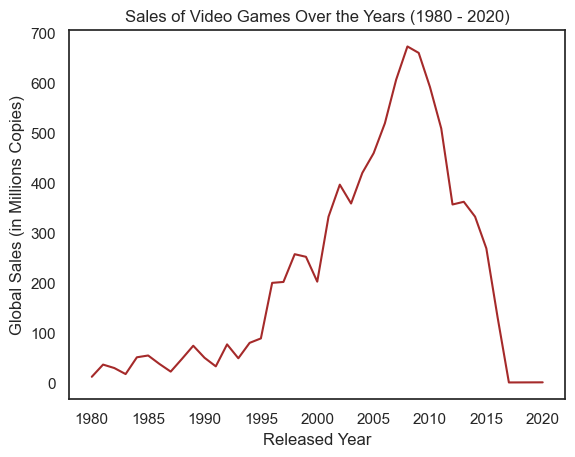

In [58]:
# aggregate dataset
year = games.groupby('release_year').agg({'global_sales': 'sum'}).reset_index()

# display year
display(year.sort_values('global_sales', ascending = False).head(10))

# Style (style, palette argument)
sns.set(style = 'white')  

# ax
ax = sns.lineplot(x = 'release_year',
                  y = 'global_sales',
                  color = 'brown',
                  data = year)

# Changing Axis Name
ax.set(xlabel = 'Released Year',
       ylabel = 'Global Sales (in Millions Copies)',
       title = 'Sales of Video Games Over the Years (1980 - 2020)')

# show the plot 
plt.show()


### 5. What platforms have the most sales in video games?

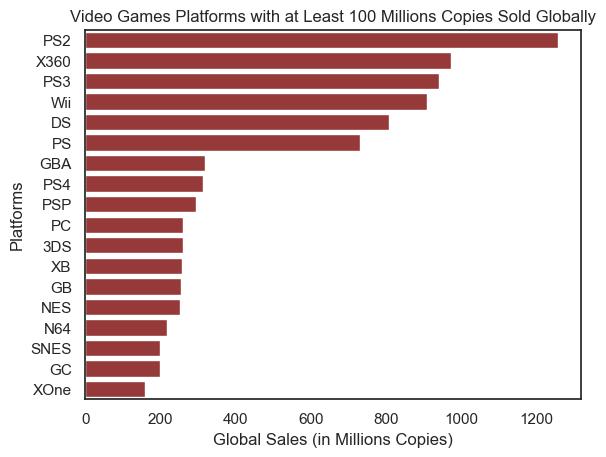

In [34]:
# aggregate dataset
plat = games.groupby('platform').agg({'global_sales': 'sum'})
plat = plat[plat['global_sales'] >= 100]
plat = plat.sort_values('global_sales', ascending = False).reset_index()

# Style (style, palette argument)
sns.set(style = 'white')  

# ax
ax = sns.barplot(x = 'global_sales',
                 y = 'platform',
                 color = 'brown',
                 data = plat)

# Changing Axis Name
ax.set(xlabel = 'Global Sales (in Millions Copies)',
       ylabel = 'Platforms',
       title = 'Video Games Platforms with at Least 100 Millions Copies Sold Globally')

# show the plot 
plt.show()

### 6. What are the association between global sales of video games and each predictors? 

# DATA CLEANING 

### Duplicates

In [131]:
# check for duplicates & NA values
nadup(games)

The dataframe has a total of 16719 rows & 12 columns. A total of 9894 NA values were detected.
  This dataframe has 0 duplicated rows


,Variables,Type,Unique Values,Sum of Unique Values,Sum of NaN Values,% of NaN
8,user_scores,float64,"8.0, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7...",96,9129,54.6
9,n_user,float64,"322.0, nan, 709.0, 192.0, 431.0, 129.0, 594.0,...",889,9129,54.6
6,critic_scores,float64,"76.0, nan, 82.0, 80.0, 89.0, 58.0, 87.0, 91.0,...",83,8582,51.3
7,n_critic,float64,"51.0, nan, 73.0, 65.0, 41.0, 80.0, 64.0, 63.0,...",107,8582,51.3
11,esrb,object,"E, nan, M, T, E10+, K-A, AO, EC, RP",9,6769,40.5
10,developer,object,"Nintendo, nan, Good Science Studio, Rockstar N...",1697,6623,39.6
2,release_year,float64,"2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0...",40,269,1.6
4,publisher,object,"Nintendo, Microsoft Game Studios, Take-Two Int...",583,54,0.3
0,name,object,"Wii Sports, Super Mario Bros., Mario Kart Wii,...",11563,2,0.0
1,platform,object,"Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, P...",31,0,0.0


Because there are no duplicates, no duplicate treatment is necessary. But there are a total of 9894 missing values, two of which are in the `name` and `genre`. 

In [132]:
# Display by variable 
(games[games['name'].isnull()])

,name,platform,release_year,genre,publisher,global_sales,critic_scores,n_critic,user_scores,n_user,developer,esrb
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.03,NaN,NaN,NaN,NaN,NaN,NaN


There is no useful information with these two rows. Many of the columns are empty. These two rows will be dropped. 

In [133]:
# drop na rows by subset
games = games.dropna(subset=["name"])

In [134]:
# drop the name columns 
games = games.drop(columns = ['name','developer','publisher'])

### NA values

##### Multiple Imputation

In [135]:
# step 1. importing library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [136]:
# step 2. create a copy
df_copy = games.copy()

In [137]:
# step 3. Dummy code all categorical values 
from pandas import get_dummies 

# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df_copy.dtypes[df_copy.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()          # list of categorical fields

# the dummy coding step
df_copy = pd.get_dummies(df_copy,
                         columns=one_hot_encode_cols,
                         drop_first=True,
                         dtype = int)

In [139]:
# step 4. identify the missing values 
missing_mask = df_copy.isna()

In [140]:
# step 5. Instantiate the MICE imputer with the desired parameters
imputer = IterativeImputer(max_iter=10, random_state=0)

# max_iter = maximum number of imputation rounds. 
# random_state = set seeds 

In [142]:
# step 6. Fit the imputer on the data and transform it to obtain the imputed values
imputed_values = imputer.fit_transform(df_copy)

In [143]:
# step 7. replace the missing values with the imputed ones
df_copy[missing_mask] = imputed_values

# check and see if there are any NA values 
nadup(df_copy)

##### Creating NA tracking columns

In [11]:
# null tracking columns
games = pd.concat([games, games.notnull().astype(int).add_suffix('_exist')], axis=1)

# info
games.head()

,name,platform,release_year,genre,publisher,global_sales,critic_scores,n_critic,user_scores,n_user,developer,esrb,name_exist,platform_exist,release_year_exist,genre_exist,publisher_exist,global_sales_exist,critic_scores_exist,n_critic_exist,user_scores_exist,n_user_exist,developer_exist,esrb_exist
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,1,1,1,1,1,1,1,1,1,1,1
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,1,1,1,1,1,1,1,1,1,1,1
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,1,1,1,1,1,1,1,1,1,1,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,0,0,0,0,0,0


# PRE-PROCESSING

### Standardization 

### Outliers

### Features Engineering 

### Train-Test Split

# SUPERVISED ML MODELS - REGRESSION

### Model 1

### Model 2

### Model 3

### Cross-Validation

### Evaluation Metric

##### Comparison Table

##### Plot of all Prediction

# CONCLUSION

# References

### Minh K. Chau